In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [203]:
data=pd.read_csv("Cloud&UV08-17 danger20 daily.csv", engine='python', header=0)
data2=data.dropna()
data2.head()
data2.tail()

,월,일,운량,일누적 자외선 A(MJ/m2),일최대 홍반자외선 B(W/m2 ),누적자외선위험,최대자외선위험,자외선위험
3571,10,27,2.8,0.52,0.149,0,0,0
3572,10,28,0.0,0.58,0.144,0,0,0
3573,10,29,0.6,0.51,0.147,0,0,0
3574,10,30,0.0,0.58,0.145,0,0,0
3575,10,31,2.0,0.56,0.138,0,0,0


In [199]:
x=data2.iloc[:,:3]
y=data2.iloc[:,-1:].values.reshape(-1,1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
# x2=data2.iloc[:,:2]
# y2=data2.iloc[:,-1:].values.reshape(-1,1)
# xtrain2,xtest2,ytrain2,ytest2=train_test_split(x2,y2,test_size=0.3,random_state=0)
# x3=data2.iloc[:,:-2]
# y3=data2.iloc[:,-2:-1].values.reshape(-1,1)
# xtrain3,xtest3,ytrain3,ytest3=train_test_split(x3,y3,test_size=0.3,random_state=0)
# x4=data2.iloc[:,:2]
# y4=data2.iloc[:,-1:].values.reshape(-1,1)
# xtrain4,xtest4,ytrain4,ytest4=train_test_split(x4,y4,test_size=0.3,random_state=0)

In [293]:
K=3
KNN=KNeighborsClassifier(K, weights='distance')
KNN.fit(xtrain,ytrain)
KResult=KNN.predict(xtest)
#print(KResult)
metrics.accuracy_score(ytest,KResult)
# KResult2=KNN.predict([[5,10,0]])
# print(KResult2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.854726368159204

In [211]:
SVM=svm.SVC(kernel='linear')
SVM.fit(xtrain,ytrain)
SResult=SVM.predict(xtest)
metrics.accuracy_score(ytest,SResult)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.727363184079602

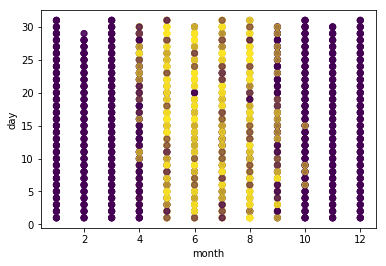

In [292]:
#iris = datasets.load_iris()
x2 = data2.values[:,:2]
y2 = data2.values[:,-1:]

plt.figure()
#plt.scatter(x2[:,0], x2[:,1],s=50, marker='D',c='r')
plt.ylabel("day")
plt.xlabel("month")
plt.scatter(data2['월'],data2['일'],c=data2['자외선위험'],alpha=0.5)
plt.show()


# k = 3
# nn = neighbors.KNeighborsClassifier(k, weights="distance")
# nn.fit(x, y)
# nn.predict([[7,3]]) # 0: Setosa, 1:Versicolour, 2:Virginica